In [1]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt


dj.config['database.host'] = 'database.eflab.org:3306'
dj.config['database.username'] = 'eflab'

experiment_dir = '/mnt/lab/data01/OpenEphys'
db_prefix = 'lab_npx_'
dj.config["enable_python_native_blobs"] = True
dj.config['custom'] = {'database_prefix': db_prefix,'ephys_root_data_dir': experiment_dir}

dj.conn()

# schemata = {'experiment_db'   : 'lab_experiments',
#             'stimulus_db'     : 'lab_stimuli',
#             'behavior_db'     : 'lab_behavior',
#             'recording_db'    : 'lab_recordings',
#             'mice_db'         : 'lab_mice' }

# # # create a virtual module for every database schema that you are going to use
# for schema, value in schemata.items():
#     globals()[schema] = dj.create_virtual_module(schema, value, create_tables=True, create_schema=True)

from build_pipeline import Subject, Session, Recording, probe, ephys, ephys_report


Please enter DataJoint username:  eflab
Please enter DataJoint password:  ········


[2025-09-16 11:31:22,488][INFO]: Connecting eflab@database.eflab.org:3306
[2025-09-16 11:31:22,520][INFO]: Connected eflab@database.eflab.org:3306


In [2]:
rec = dj.create_virtual_module('lab_recordings.py', 'lab_recordings')

In [13]:
ephys.EphysRecording.populate(key, display_progress=True)

animal_id animal id,session session number,insertion_number,electrode_config_hash,acq_software,sampling_rate (Hz),recording_datetime datetime of the recording from this probe,recording_duration (seconds) duration of the recording from this probe


In [3]:
key = {'animal_id' : 244,
       'session' : 283,
       'insertion_number' : 1}

Subject() & key

animal_id animal id,session session number,user_name user performing the experiment,setup computer id,session_tmst session timestamp,experiment_type,logger_tmst logger precise timestamp
244,283,maria,ef-rp5,2025-07-30 11:04:01,MatchPort,0.0


In [4]:
ephys.ClusteringTask & key

animal_id animal id,session session number,insertion_number,paramset_idx,clustering_output_dir clustering output directory relative to the clustering root data directory,"task_mode 'load': load computed analysis results, 'trigger': trigger computation"
244,283,1,3,244_283_1_2025-07-30_11-04-01/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output,load


In [6]:
string = "244_225_1_2025-07-03_13-43-54/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output"
i = string.index('A/k')
string[:i]

'244_225_1_2025-07-03_13-43-54/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.Probe'

In [4]:
import re
string = "244_225_1_2025-07-03_13-43-54/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output"

def keep_until_probe(s):
    match = re.search(r"(.*?\.Probe[^/]+/)(?=kilosort)", s)
    print(match)
    return match.group(1) if match else s

string = keep_until_probe(string)
string

<re.Match object; span=(0, 104), match='244_225_1_2025-07-03_13-43-54/Record Node 101/exp>


'244_225_1_2025-07-03_13-43-54/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/'

In [7]:
ephys.QualityMetrics.

animal_id animal id,session session number,insertion_number,paramset_idx,unit,amplitude_median (uV) absolute difference between waveform peak and trough,peak_to_valley (ms) time between waveform peak and trough,half_width (ms) spike width at half max amplitude,peak_trough_ratio absolute amplitude of peak divided by absolute amplitude of trough relative to 0,repolarization_slope the repolarization slope was defined by fitting a regression line to the first 30us from trough to peak,recovery_slope the recovery slope was defined by fitting a regression line to the first 30us from peak to tail,spread (um) the range with amplitude above 12-percent of the maximum amplitude along the probe,velocity_above (s/m) inverse velocity of waveform propagation from the soma toward the top of the probe,velocity_below (s/m) inverse velocity of waveform propagation from the soma toward the bottom of the probe,num_positive_peaks,num_negative_peaks,exp_decay
244,283,1,3,0,66.885,0.00124333,0.00132,-0.200965,71043.0,-20526.5,90.0,nan,nan,1.0,1.0,0.00351934
244,283,1,3,1,17.355,0.00084,0.00031,-0.294477,148725.0,-23378.3,90.0,nan,nan,2.0,1.0,0.0279673
244,283,1,3,2,24.18,0.000833333,0.00024,-0.288959,217422.0,-33734.3,60.0,nan,nan,1.0,1.0,0.0261229
244,283,1,3,3,46.215,0.000593333,0.00199,-1.52775,39087.7,-89019.6,120.0,37.7815,nan,1.0,1.0,0.00955719
244,283,1,3,4,139.815,6.66667e-05,0.00185,-0.958033,3970350.0,-6376.61,90.0,nan,nan,0.0,0.0,0.00820124
244,283,1,3,5,142.935,6.66667e-05,0.00172333,-0.906766,4436500.0,17671.6,90.0,nan,nan,0.0,0.0,0.00851597
244,283,1,3,6,13.65,0.000716667,0.000276667,-0.324688,141258.0,-21274.0,120.0,nan,nan,1.0,1.0,0.0343427
244,283,1,3,7,143.617,6.66667e-05,0.00212,-1.08202,3859520.0,-5099.36,180.0,nan,nan,0.0,0.0,0.00729127
244,283,1,3,8,19.695,0.000713333,0.000226667,-0.31022,201312.0,-27677.7,120.0,1549.71,nan,1.0,1.0,0.0243837
244,283,1,3,9,143.52,0.000456667,0.00184333,-1.08056,3744020.0,-20808.7,180.0,nan,nan,0.0,0.0,0.00759205


In [8]:
ephys.QualityMetrics.Cluster()

animal_id animal id,session session number,insertion_number,paramset_idx,unit,num_spikes Number of spikes,firing_rate (Hz) firing rate for a unit,snr signal-to-noise ratio for a unit,presence_ratio fraction of time in which spikes are present,isi_violations_ratio rate of ISI violation as a fraction of overall rate,isi_violations_count total number of ISI violations,amplitude_cutoff estimate of miss rate based on amplitude histogram,amplitude_median,amplitude_cv_median,amplitude_cv_range,isolation_distance distance to nearest cluster in Mahalanobis space,l_ratio,d_prime Classification accuracy based on LDA,nn_hit_rate Fraction of neighbors for target cluster that are also in target cluster,nn_miss_rate Fraction of neighbors outside target cluster that are in target cluster,silhouette Standard metric for cluster overlap,drift_ptp Maximum change in spike depth throughout recording,drift_mad Cumulative change in spike depth throughout recording,drift_std,rp_contamination,rp_violations,sliding_rp_violation,sync_spike_2,sync_spike_4,sync_spike_8,firing_range,sd_ratio
244,283,1,3,0,2475.0,0.709615,2.36306,1.0,57.887,305,0.000239296,66.885,0.376171,0.335637,69.2784,1.47635,2.75364,0.560811,0.0191329,0.107392,nan,nan,nan,1.0,176.0,nan,0.342222,0.0218182,0.0,4.8,1.10102
244,283,1,3,1,4327.0,1.24061,2.60117,1.0,0.310476,5,6.15437e-05,17.355,1.57438,0.959756,81.059,0.584779,3.40289,0.439865,0.0186137,0.0471289,nan,nan,nan,0.0979387,1.0,0.29,0.145135,0.00716432,0.000693321,3.24,1.01791
244,283,1,3,2,15959.0,4.57565,3.89289,1.0,0.136943,30,1.62154e-05,24.18,1.14163,0.862701,81.4794,0.539705,3.97962,0.634459,0.00931983,0.10593,1.04115,0.169072,0.249679,0.108605,15.0,0.125,0.0994423,0.00137853,0.000187982,12.0,1.01223
244,283,1,3,3,862.0,0.247147,1.49701,1.0,0.0,0,0.00293723,46.215,0.595457,0.379135,134.86,0.0476171,4.4107,0.896259,0.00141665,0.183495,nan,nan,nan,0.0,0.0,nan,0.136891,0.00116009,0.0,0.8,1.18848
244,283,1,3,4,4056.0,1.16291,5.60779,0.982759,16.2541,230,0.00243291,139.815,nan,nan,81.4075,0.545734,3.69457,0.682432,0.0124091,0.101762,nan,nan,nan,1.0,139.0,nan,0.0756903,0.000246548,0.0,5.0,1.69756
244,283,1,3,5,1381.0,0.395951,6.10787,0.965517,15.24,25,0.00751238,142.935,0.36919,0.214937,82.3151,0.489003,3.72967,0.564189,0.017731,0.0991084,nan,nan,nan,1.0,7.0,nan,0.0796524,0.000724113,0.0,1.8,1.77574
244,283,1,3,6,2783.0,0.797922,2.30377,1.0,0.300217,2,0.000672,13.65,2.05677,1.39111,102.842,0.581225,3.36796,0.386905,0.00965897,0.0383607,nan,nan,nan,0.0,0.0,nan,0.115343,0.00395257,0.0,1.6,1.20404
244,283,1,3,7,2142.0,0.614139,5.09826,0.965517,19.2578,76,0.017865,143.617,nan,nan,137.652,0.887399,5.2173,0.877329,0.00246468,0.23809,nan,nan,nan,1.0,27.0,nan,0.0728291,0.000933707,0.000466853,2.64,1.29442
244,283,1,3,8,13089.0,3.75279,3.39593,1.0,0.15608,23,3.20644e-05,19.695,1.19809,0.802193,114.087,0.286421,3.70446,0.392857,0.012518,0.0435045,1.76076,0.300438,0.406777,0.0962433,9.0,0.12,0.0961876,0.0006112,0.0001528,5.0,1.04354
244,283,1,3,9,2687.0,0.770398,5.84771,0.965517,11.7549,73,0.0099644,143.52,nan,nan,122.363,2.10133,4.78617,0.81677,0.00221059,0.17551,nan,nan,nan,1.0,33.0,nan,0.0934127,0.00111649,0.000372162,3.2,1.33561


In [6]:
ephys.QualityMetrics().populate(key, display_progress=True)
# ephys.QualityMetrics().drop()

QualityMetrics:   0%|          | 0/1 [00:00<?, ?it/s]

<re.Match object; span=(0, 104), match='244_283_1_2025-07-30_11-04-01/Record Node 101/exp>
Checking /mnt/lab/data01/OpenEphys/244_283_1_2025-07-30_11-04-01/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/sorting_analyzer/extensions/quality_metrics/metrics.csv
Loaded quality_metrics metrics: (574, 28)
Collumns ['Unnamed: 0', 'num_spikes', 'firing_rate', 'presence_ratio', 'snr', 'isi_violations_ratio', 'isi_violations_count', 'rp_contamination', 'rp_violations', 'sliding_rp_violation', 'amplitude_cutoff', 'amplitude_median', 'amplitude_cv_median', 'amplitude_cv_range', 'sync_spike_2', 'sync_spike_4', 'sync_spike_8', 'firing_range', 'drift_ptp', 'drift_std', 'drift_mad', 'sd_ratio', 'isolation_distance', 'l_ratio', 'd_prime', 'silhouette', 'nn_hit_rate', 'nn_miss_rate']
Checking /mnt/lab/data01/OpenEphys/244_283_1_2025-07-30_11-04-01/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/sorting_analyzer/extensions/template_metrics/metrics.csv


QualityMetrics: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Final metrics list length: 574


In [15]:
# keys = [{'animal_id' : 244,
#        'session' : 228,
#        'insertion_number' : 1,},
#         {'animal_id' : 244,
#        'session' : 229,
#        'insertion_number' : 1,},
#         {'animal_id' : 244,
#        'session' : 230,
#        'insertion_number' : 1,},
#         {'animal_id' : 244,
#        'session' : 231,
#        'insertion_number' : 1,},
#         {'animal_id' : 244,
#        'session' : 233,
#        'insertion_number' : 1,},
#        ]

keys = [key]

In [6]:
ephys.EphysRecording() & key


animal_id animal id,session session number,insertion_number,electrode_config_hash,acq_software,sampling_rate (Hz),recording_datetime datetime of the recording from this probe,recording_duration (seconds) duration of the recording from this probe


In [7]:
ephys.Clustering() & key

animal_id animal id,session session number,insertion_number,paramset_idx,clustering_time time of generation of this set of clustering results,package_version


In [8]:
ephys.CuratedClustering.Unit()& key

animal_id animal id,session session number,insertion_number,paramset_idx,unit,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0","cluster_quality_label cluster quality type - e.g. 'good', 'MUA', 'noise', etc.",spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"


In [7]:
ephys.QualityMetrics.drop()


[2025-09-15 11:52:05,478][INFO]: `lab_npx_ephys`.`_quality_metrics` (1 tuples)
[2025-09-15 11:52:05,484][INFO]: `lab_npx_ephys`.`_quality_metrics__waveform` (124 tuples)
[2025-09-15 11:52:05,492][INFO]: `lab_npx_ephys`.`_quality_metrics__cluster` (124 tuples)
[2025-09-15 11:52:05,497][INFO]: `lab_npx_ephys_report`.`quality_metric_set` (0 tuples)
[2025-09-15 11:52:05,503][INFO]: `lab_npx_ephys_report`.`__quality_metric_report` (0 tuples)


Proceed? [yes, No]:  yes


[2025-09-15 11:52:07,888][INFO]: Dropped table `lab_npx_ephys_report`.`__quality_metric_report`
[2025-09-15 11:52:07,922][INFO]: Dropped table `lab_npx_ephys_report`.`quality_metric_set`
[2025-09-15 11:52:07,953][INFO]: Dropped table `lab_npx_ephys`.`_quality_metrics__cluster`
[2025-09-15 11:52:07,985][INFO]: Dropped table `lab_npx_ephys`.`_quality_metrics__waveform`
[2025-09-15 11:52:08,015][INFO]: Dropped table `lab_npx_ephys`.`_quality_metrics`
[2025-09-15 11:52:08,022][INFO]: Tables dropped. Restart kernel.


In [16]:
# Checked and works
for key in keys:
    ephys.ProbeInsertion.insert1(
    dict(
        key,
        probe=(probe.Probe() & 'probe_type="Neuropixels 2.0 - Multishank"').fetch('probe')[0],
        ), skip_duplicates=True
    )  # probe, subject, session_datetime needs to follow the restrictions of foreign keys.
    #ephys.ProbeInsertion()
    ephys.EphysRecording().populate(key, display_progress=True)

    key['paramset_idx']=3
    file_path = (ephys.EphysRecording.EphysFile() & key).fetch('file_path')
    ks_path = file_path[0]+'/kilosort4/sorter_output'
    ephys.ClusteringTask.insert1(
        dict(
            key,
            task_mode="load",  # load or trigger
            clustering_output_dir=ks_path,
        )
    )

    ephys.Clustering.populate(key, display_progress=True)
    (ephys.CuratedClustering).populate(key, display_progress=True)
        

EphysRecording:   0%|          | 0/1 [00:00<?, ?it/s]

/mnt/lab/data01/OpenEphys/244_283_1_2025-07-30_11-04-01
/mnt/lab/data01/OpenEphys/244_283_1_2025-07-30_11-04-01
inside openephys class
/mnt/lab/data01/OpenEphys/244_283_1_2025-07-30_11-04-01/Record Node 101/experiment1/recording1
recording1
/mnt/lab/data01/OpenEphys/244_283_1_2025-07-30_11-04-01/Record Node 101
if
/mnt/lab/data01/OpenEphys/244_283_1_2025-07-30_11-04-01/Record Node 101
{'@name': 'ProbeA', '@description': 'description', '@sample_rate': '30000.0', '@channel_count': '384', '@device_name': 'Neuropixels 2.0 - Multishank', 'PARAMETERS': None}
line 118
['ProbeA']
23107806184
line145
{'@name': 'ProbeA', '@description': 'description', '@sample_rate': '30000.0', '@channel_count': '384', '@device_name': 'Neuropixels 2.0 - Multishank', 'PARAMETERS': {'@enable_stream': '1'}}
{'@name': 'ProbeA', '@description': 'description', '@sample_rate': '30000.0', '@channel_count': '384', '@device_name': 'Neuropixels 2.0 - Multishank', 'PARAMETERS': {'@enable_stream': '1'}}
{'@name': 'ProbeA', '

EphysRecording: 100%|██████████| 1/1 [01:16<00:00, 76.76s/it]


line 169
ProbeA
ProbeA
line 184, ap only


Clustering: 100%|██████████| 1/1 [00:00<00:00, 133.79it/s]


['/mnt/lab/data01/OpenEphys']
244_283_1_2025-07-30_11-04-01/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output
/mnt/lab/data01/OpenEphys/244_283_1_2025-07-30_11-04-01/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output


CuratedClustering:   0%|          | 0/1 [00:00<?, ?it/s]

line 1037: /mnt/lab/data01/OpenEphys/244_283_1_2025-07-30_11-04-01/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output
kilosort4
/mnt/lab/data01/OpenEphys/244_283_1_2025-07-30_11-04-01/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output/sorting_analyzer
574
9236529
HERE
574 574


/mnt/lab/users/stamatis/My_Code/Python/Pipeline/element_array_ephys/element_array_ephys/readers/kilosort.py:182: RuntimeWarning: invalid value encountered in divide
  self._data["spike_depths"] = np.sum(


line 1167
9236529
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 

CuratedClustering: 100%|██████████| 1/1 [04:10<00:00, 250.06s/it]


In [17]:
ephys.ProbeInsertion() & key

animal_id animal id,session session number,insertion_number,probe unique identifier for this model of probe (e.g. serial number)
244,283,1,23107806184


In [7]:
ephys.ProbeInsertion() & key

animal_id animal id,session session number,insertion_number,probe unique identifier for this model of probe (e.g. serial number)
244,225,1,23107806184


In [26]:
probe1=(probe.Probe() & 'probe_type="Neuropixels 2.0 - Multishank"').fetch('probe')[0]
probe1

'23107806184'

In [27]:
ephys.ProbeInsertion.insert1(
    dict(
        key,
        probe=(probe.Probe() & 'probe_type="Neuropixels 2.0 - Multishank"').fetch('probe')[0],
    )
)  # probe, subject, session_datetime needs to follow the restrictions of foreign keys.
ephys.ProbeInsertion()

KeyError: '`paramset_idx` is not in the table heading'

animal_id animal id,session session number,insertion_number,electrode_config_hash,acq_software,sampling_rate (Hz),recording_datetime datetime of the recording from this probe,recording_duration (seconds) duration of the recording from this probe
244,225,1,7c36bff0-7661-5320-7844-9cb708b5b41c,Open Ephys,30000.0,2025-07-03 14:09:16,48.9805


In [30]:
ephys.EphysRecording().populate(key, display_progress=True)


In [20]:
ephys.EphysRecording.EphysFile() & key


animal_id animal id,session session number,insertion_number,file_path filepath relative to root data directory
244,283,1,244_283_1_2025-07-30_11-04-01/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA


In [15]:
ephys.QualityMetrics().drop()

[2025-09-10 14:25:12,601][INFO]: `lab_npx_ephys`.`_quality_metrics` (1 tuples)
[2025-09-10 14:25:12,608][INFO]: `lab_npx_ephys`.`_quality_metrics__waveform` (124 tuples)
[2025-09-10 14:25:12,615][INFO]: `lab_npx_ephys`.`_quality_metrics__cluster` (124 tuples)
[2025-09-10 14:25:12,629][INFO]: `lab_npx_ephys_report`.`quality_metric_set` (0 tuples)
[2025-09-10 14:25:12,635][INFO]: `lab_npx_ephys_report`.`__quality_metric_report` (0 tuples)


Proceed? [yes, No]:  yes


[2025-09-10 14:25:23,863][INFO]: Dropped table `lab_npx_ephys_report`.`__quality_metric_report`
[2025-09-10 14:25:23,900][INFO]: Dropped table `lab_npx_ephys_report`.`quality_metric_set`
[2025-09-10 14:25:23,929][INFO]: Dropped table `lab_npx_ephys`.`_quality_metrics__cluster`
[2025-09-10 14:25:23,963][INFO]: Dropped table `lab_npx_ephys`.`_quality_metrics__waveform`
[2025-09-10 14:25:23,997][INFO]: Dropped table `lab_npx_ephys`.`_quality_metrics`
[2025-09-10 14:25:24,003][INFO]: Tables dropped. Restart kernel.


In [14]:
(ephys.Clustering() & key)#.delete()

[2025-09-10 14:24:42,906][WARNING]: MySQL server has gone away. Reconnecting to the server.


animal_id animal id,session session number,insertion_number,paramset_idx,clustering_time time of generation of this set of clustering results,package_version
244,225,1,3,2025-08-29 10:35:37,


In [34]:
ephys.ClusteringMethod()

clustering_method,clustering_method_desc
kilosort2,kilosort2 clustering method
kilosort2.5,kilosort2.5 clustering method
kilosort3,kilosort3 clustering method
kilosort4,kilosort4 clustering method


In [38]:
ephys.ClusteringParamSet()

paramset_idx,clustering_method,paramset_desc,param_set_hash,params dictionary of all applicable parameters
0,kilosort4,Default params kilosort4,b611e082-bdaa-6ef6-1c13-acba4904a1f5,=BLOB=
1,kilosort4,"kilosort4 params acg:0.1, ccg:0.15, xcenters:4",d59a35a8-6ec7-e2bf-81b4-c1f80402a8b9,=BLOB=
2,kilosort4,"kilosort4 params acg:0.1, ccg:0.15, xcenters:None",0ad61454-47dc-2fde-90f5-ff1f574cee61,=BLOB=
3,kilosort4,"si kilosort4 params acg:0.1, ccg:0.15, xcenters:None",6d0118fc-8f39-8b16-130b-39ae79013ef3,=BLOB=


In [37]:
ephys.ClusteringTask() & key

animal_id animal id,session session number,insertion_number,paramset_idx,clustering_output_dir clustering output directory relative to the clustering root data directory,"task_mode 'load': load computed analysis results, 'trigger': trigger computation"
244,225,1,3,244_225_1_2025-07-03_13-43-54/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output,load


In [28]:
# # insert clustering task manually
# import numpy as np
# params_ks = {
#     'data_dtype': 'int16',
#     'n_chan_bin': 384,
#     'fs': 30000.0,
#     'batch_size': 100000,
#     'nblocks': 1,
#     'Th_universal': 9.0,
#     'Th_learned': 8.0,
#     'tmin': 0.0,
#     'tmax': np.inf,
#     'nt': 61,
#     'shift': None,
#     'scale': None,
#     'artifact_threshold': np.inf,
#     'nskip': 25,
#     'whitening_range': 32,
#     'highpass_cutoff': 300.0,
#     'binning_depth': 5.0,
#     'sig_interp': 20.0,
#     'drift_smoothing': [0.5, 0.5, 0.5],
#     'nt0min': 20,
#     'dmin': None,
#     'dminx': 32.0,
#     'min_template_size': 10.0,
#     'template_sizes': 5,
#     'nearest_chans': 10,
#     'nearest_templates': 100,
#     'max_channel_distance': 32.0,
#     'max_peels': 100,
#     'templates_from_data': True,
#     'n_templates': 6,
#     'n_pcs': 6,
#     'Th_single_ch': 6.0,
#     'acg_threshold': 0.1,
#     'ccg_threshold': 0.15,
#     'cluster_downsampling': 20,
#     'x_centers': None,
#     'duplicate_spike_ms': 0.15,
#     'position_limit': 100.0,
#     'save_preprocessed_copy': False,
#     'clear_cache': False,
#     'do_CAR': True,
#     'invert_sign': False,
#     'verbose_log': False,
#     'NTbuff': 100122,
#     'Nchan': 384,
#     'duplicate_spike_bins': 4,
#     'torch_device': 'cuda'
# }

In [29]:
# insert clustering task manually
# params_ks = {
#     "fs": 30000,
#     "fshigh": 150,
#     "minfr_goodchannels": 0.1,
#     "Th": [10, 4],
#     "lam": 10,
#     "AUCsplit": 0.9,
#     "minFR": 0.02,
#     "momentum": [20, 400],
#     "sigmaMask": 30,
#     "ThPr": 8,
#     "spkTh": -6,
#     "reorder": 1,
#     "nskip": 25,
#     "GPU": 1,
#     "Nfilt": 1024,
#     "nfilt_factor": 4,
#     "ntbuff": 64,
#     "whiteningRange": 32,
#     "nSkipCov": 25,
#     "scaleproc": 200,
#     "nPCs": 3,
#     "useRAM": 0,
# }
ephys.ClusteringParamSet.insert_new_params(
    clustering_method="kilosort4",
    paramset_idx=3,
    params=params_ks,
    paramset_desc="si kilosort4 params acg:0.1, ccg:0.15, xcenters:None",
)
ephys.ClusteringParamSet()

paramset_idx,clustering_method,paramset_desc,param_set_hash,params dictionary of all applicable parameters
0,kilosort4,Default params kilosort4,b611e082-bdaa-6ef6-1c13-acba4904a1f5,=BLOB=
1,kilosort4,"kilosort4 params acg:0.1, ccg:0.15, xcenters:4",d59a35a8-6ec7-e2bf-81b4-c1f80402a8b9,=BLOB=
2,kilosort4,"kilosort4 params acg:0.1, ccg:0.15, xcenters:None",0ad61454-47dc-2fde-90f5-ff1f574cee61,=BLOB=
3,kilosort4,"si kilosort4 params acg:0.1, ccg:0.15, xcenters:None",6d0118fc-8f39-8b16-130b-39ae79013ef3,=BLOB=


In [39]:
file_path = (ephys.EphysRecording.EphysFile() & key).fetch('file_path')
ks_path = file_path[0]+'/kilosort4/sorter_oputput'
ks_path

'244_225_1_2025-07-03_13-43-54/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_oputput'

In [72]:
file_path = (ephys.EphysRecording.EphysFile() & key).fetch('file_path')
ks_path = file_path[0]+'/kilosort4/sorter_output'

ephys.ClusteringTask.insert1(
    dict(
        key,
        paramset_idx=3,
        task_mode="load",  # load or trigger
        clustering_output_dir=ks_path,
    )
)

In [40]:
(ephys.ClusteringTask() & key)#.delete()

animal_id animal id,session session number,insertion_number,paramset_idx,clustering_output_dir clustering output directory relative to the clustering root data directory,"task_mode 'load': load computed analysis results, 'trigger': trigger computation"
244,225,1,3,244_225_1_2025-07-03_13-43-54/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output,load


In [42]:
ephys.Clustering.populate(key, display_progress=True)


In [43]:
ephys.Clustering() & key

animal_id animal id,session session number,insertion_number,paramset_idx,clustering_time time of generation of this set of clustering results,package_version
244,225,1,3,2025-08-29 10:35:37,


In [44]:
ephys.CuratedClustering() & key

animal_id animal id,session session number,insertion_number,paramset_idx
244,225,1,3


In [77]:
key['paramset_idx']=3
key

{'animal_id': 244, 'session': 186, 'insertion_number': 1, 'paramset_idx': 3}

In [78]:
(ephys.CuratedClustering).populate(key, display_progress=True)

CuratedClustering:   0%|          | 0/1 [00:00<?, ?it/s]

line 1037: /mnt/lab/data01/OpenEphys/244_186_1_2025-05-16_10-15-07/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output
kilosort4
/mnt/lab/data01/OpenEphys/244_186_1_2025-05-16_10-15-07/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output/sorting_analyzer
685
12691145
HERE
685 685


/mnt/lab/users/maria/github/element-array-ephys/element_array_ephys/readers/kilosort.py:182: RuntimeWarning: invalid value encountered in divide
  self._data["spike_depths"] = np.sum(


line 1167
12691145
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

CuratedClustering: 100%|██████████| 1/1 [01:26<00:00, 86.12s/it]


{'success_count': 1, 'error_list': []}

In [45]:
ephys.CuratedClustering.Unit & key  #& 'cluster_quality_label = "good"'

animal_id animal id,session session number,insertion_number,paramset_idx,unit,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0","cluster_quality_label cluster quality type - e.g. 'good', 'MUA', 'noise', etc.",spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
244,225,1,3,0,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,0,mua,470,=BLOB=,=BLOB=,=BLOB=
244,225,1,3,1,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,4,mua,302,=BLOB=,=BLOB=,=BLOB=
244,225,1,3,2,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,10,mua,396,=BLOB=,=BLOB=,=BLOB=
244,225,1,3,3,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,16,mua,779,=BLOB=,=BLOB=,=BLOB=
244,225,1,3,4,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,16,mua,274,=BLOB=,=BLOB=,=BLOB=
244,225,1,3,5,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,22,mua,747,=BLOB=,=BLOB=,=BLOB=
244,225,1,3,6,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,20,good,716,=BLOB=,=BLOB=,=BLOB=
244,225,1,3,7,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,20,good,475,=BLOB=,=BLOB=,=BLOB=
244,225,1,3,8,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,24,good,277,=BLOB=,=BLOB=,=BLOB=
244,225,1,3,9,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,26,mua,772,=BLOB=,=BLOB=,=BLOB=


In [59]:
ephys.CuratedClustering.Unit & "animal_id=244" & "session=163" #& "unit>263"  #& 'cluster_quality_label = "good"'

animal_id animal id,session session number,insertion_number,paramset_idx,unit,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0","cluster_quality_label cluster quality type - e.g. 'good', 'MUA', 'noise', etc.",spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
244,163,1,0,0,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,2,mua,23,=BLOB=,=BLOB=,=BLOB=
244,163,1,0,1,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,6,good,1101,=BLOB=,=BLOB=,=BLOB=
244,163,1,0,2,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,10,good,2531,=BLOB=,=BLOB=,=BLOB=
244,163,1,0,3,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,14,good,5420,=BLOB=,=BLOB=,=BLOB=
244,163,1,0,4,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,12,mua,1296,=BLOB=,=BLOB=,=BLOB=
244,163,1,0,5,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,14,good,2980,=BLOB=,=BLOB=,=BLOB=
244,163,1,0,6,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,16,mua,1866,=BLOB=,=BLOB=,=BLOB=
244,163,1,0,7,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,20,good,4098,=BLOB=,=BLOB=,=BLOB=
244,163,1,0,8,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,27,mua,1666,=BLOB=,=BLOB=,=BLOB=
244,163,1,0,9,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,26,good,270,=BLOB=,=BLOB=,=BLOB=


In [12]:
# (ephys.CuratedClustering & key).delete()

[2025-05-30 14:24:11,075][INFO]: Deleting 621 rows from `lab_npx_ephys`.`_curated_clustering__unit`
[2025-05-30 14:24:11,081][INFO]: Deleting 1 rows from `lab_npx_ephys`.`_curated_clustering`


Commit deletes? [yes, No]:  yes


[2025-05-30 14:24:14,695][INFO]: Deletes committed.


1

In [61]:
ephys.WaveformSet.Waveform() & "session=163" & "unit>263"

animal_id animal id,session session number,insertion_number,paramset_idx,unit,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0",waveform_mean (uV) mean waveform across spikes of the given unit,waveforms (uV) (spike x sample) waveforms of a sampling of spikes at the given electrode for the given unit
244,163,1,0,264,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,0,=BLOB=,=BLOB=
244,163,1,0,264,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,1,=BLOB=,=BLOB=
244,163,1,0,264,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,2,=BLOB=,=BLOB=
244,163,1,0,264,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,3,=BLOB=,=BLOB=
244,163,1,0,264,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,4,=BLOB=,=BLOB=
244,163,1,0,264,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,5,=BLOB=,=BLOB=
244,163,1,0,264,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,6,=BLOB=,=BLOB=
244,163,1,0,264,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,7,=BLOB=,=BLOB=
244,163,1,0,264,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,8,=BLOB=,=BLOB=
244,163,1,0,264,7c36bff0-7661-5320-7844-9cb708b5b41c,Neuropixels 2.0 - Multishank,9,=BLOB=,=BLOB=


In [47]:
## this doesn't populate because of size 
ephys.WaveformSet.populate(key, display_progress=True)

WaveformSet:   0%|          | 0/1 [00:00<?, ?it/s]

/mnt/lab/data01/OpenEphys/244_225_1_2025-07-03_13-43-54
/mnt/lab/data01/OpenEphys/244_225_1_2025-07-03_13-43-54
inside openephys class
/mnt/lab/data01/OpenEphys/244_225_1_2025-07-03_13-43-54/Record Node 101/experiment1/recording1
recording1
/mnt/lab/data01/OpenEphys/244_225_1_2025-07-03_13-43-54/Record Node 101
if
/mnt/lab/data01/OpenEphys/244_225_1_2025-07-03_13-43-54/Record Node 101
{'@name': 'ProbeA', '@description': 'description', '@sample_rate': '30000.0', '@channel_count': '384', '@device_name': 'Neuropixels 2.0 - Multishank', 'PARAMETERS': None}
line 118
['ProbeA']
23107806184
line145
{'@name': 'ProbeA', '@description': 'description', '@sample_rate': '30000.0', '@channel_count': '384', '@device_name': 'Neuropixels 2.0 - Multishank', 'PARAMETERS': {'@enable_stream': '1'}}
{'@name': 'ProbeA', '@description': 'description', '@sample_rate': '30000.0', '@channel_count': '384', '@device_name': 'Neuropixels 2.0 - Multishank', 'PARAMETERS': {'@enable_stream': '1'}}
{'@name': 'ProbeA', '

WaveformSet:   0%|          | 0/1 [01:22<?, ?it/s]


KeyboardInterrupt: 

In [3]:
## ephys.LFP.populate(key, display_progress=True) ## not supported for the new OpenEphys as LFP data is not saved separately..

LFP:   0%|          | 0/1 [00:00<?, ?it/s]

/mnt/lab/data01/OpenEphys/244_163_1_2025-04-16_11-32-00
inside openephys class
/mnt/lab/data01/OpenEphys/244_163_1_2025-04-16_11-32-00/Record Node 101/experiment1/recording1
recording1
/mnt/lab/data01/OpenEphys/244_163_1_2025-04-16_11-32-00/Record Node 101
if
/mnt/lab/data01/OpenEphys/244_163_1_2025-04-16_11-32-00/Record Node 101
{'@name': 'ProbeA', '@description': 'description', '@sample_rate': '30000.0', '@channel_count': '384', '@device_name': 'Neuropixels 2.0 - Multishank', 'PARAMETERS': None}
line 118
['ProbeA']
23107806184
line145
{'@name': 'ProbeA', '@description': 'description', '@sample_rate': '30000.0', '@channel_count': '384', '@device_name': 'Neuropixels 2.0 - Multishank', 'PARAMETERS': {'@enable_stream': '1'}}
{'@name': 'ProbeA', '@description': 'description', '@sample_rate': '30000.0', '@channel_count': '384', '@device_name': 'Neuropixels 2.0 - Multishank', 'PARAMETERS': {'@enable_stream': '1'}}
{'@name': 'ProbeA', '@description': 'description', '@sample_rate': '30000.0',

LFP:   0%|          | 0/1 [00:00<?, ?it/s]

line 169
ProbeA
ProbeA
line 184, ap only
{}


KeyError: 'channels_indices'

In [4]:
units, unit_spiketimes = (
    ephys.CuratedClustering.Unit
    & key
    & 'unit IN ("6","7","9","14","15","17","19")'
).fetch("unit", "spike_times")

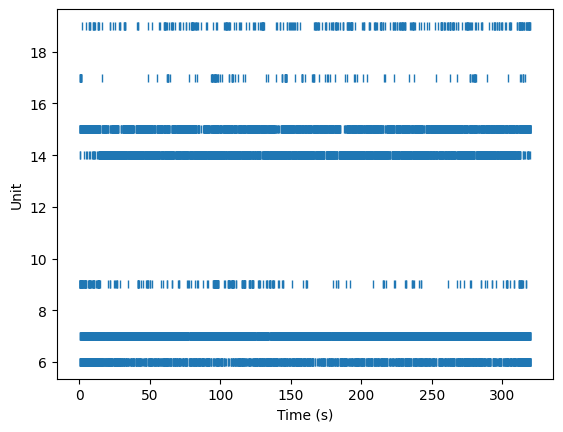

In [7]:
x = np.hstack(unit_spiketimes)
y = np.hstack([np.full_like(s, u) for u, s in zip(units, unit_spiketimes)])
plt.plot(x, y, "|")
plt.xlabel("Time (s)")
plt.ylabel("Unit");

In [12]:
unit_key = (ephys.CuratedClustering.Unit & key & "unit = '6'").fetch1("KEY")
unit_data = (
    ephys.CuratedClustering.Unit * ephys.WaveformSet.PeakWaveform & unit_key
).fetch1()


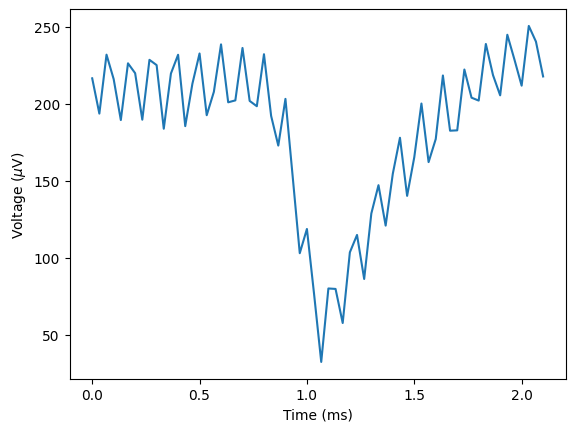

In [13]:
sampling_rate = (ephys.EphysRecording & key).fetch1(
    "sampling_rate"
) / 1000  # in kHz
plt.plot(
    np.r_[: unit_data["peak_electrode_waveform"].size] * 1 / sampling_rate,
    unit_data["peak_electrode_waveform"],
)
plt.xlabel("Time (ms)")
plt.ylabel(r"Voltage ($\mu$V)");

In [3]:
key

NameError: name 'key' is not defined

In [3]:
ephys.QualityMetrics().populate(key, display_progress=True)

QualityMetrics:   0%|          | 0/1 [00:00<?, ?it/s]


Should I reload everytime??


FileNotFoundError: QC metrics file not found in: /mnt/lab/data01/OpenEphys/244_225_1_2025-07-03_13-43-54/Record Node 101/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA/kilosort4/sorter_output

In [7]:
# probe.ProbeType.insert1(
#     dict(probe_type="Neuropixels 2.0 - Multishank")
# )  # this info could be achieve from neuropixels meta file.
probe.ProbeType()

probe_type e.g. neuropixels_1.0
neuropixels 1.0 - 3A
neuropixels 1.0 - 3B
neuropixels 2.0 - MS
Neuropixels 2.0 - Multishank
neuropixels 2.0 - SS
neuropixels UHD


In [3]:
probe.ProbeType()

probe_type e.g. neuropixels_1.0
neuropixels 1.0 - 3A
neuropixels 1.0 - 3B
neuropixels 2.0 - MS
Neuropixels 2.0 - Multishank
neuropixels 2.0 - SS
neuropixels UHD


In [5]:
probe.Probe.insert1(
    dict(probe="19108323584", probe_type="Neuropixels 2.0 - Multishank", probe_comment="fake probe")
)  # this info could be achieve from neuropixels meta file.
probe.Probe()

probe unique identifier for this model of probe (e.g. serial number),probe_type e.g. neuropixels_1.0,probe_comment
19108323581,neuropixels 1.0 - 3B,fake probe
19108323583,neuropixels 2.0 - MS,fake probe
19108323584,Neuropixels 2.0 - Multishank,fake probe


In [4]:
probe.ProbeType.Electrode() & 'probe_type = "Neuropixels 2.0 - Multishank"'

probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0","shank shank index, starts at 0, advance left to right","shank_col column index, starts at 0, advance left to right","shank_row row index, starts at 0.",x_coord (um) x coordinate of the electrode within the probe.,y_coord (um) y coordinate of the electrode within the probe.
Neuropixels 2.0 - Multishank,0,0,0,0,27.0,0.0
Neuropixels 2.0 - Multishank,1,0,1,0,59.0,0.0
Neuropixels 2.0 - Multishank,2,0,0,1,27.0,15.0
Neuropixels 2.0 - Multishank,3,0,1,1,59.0,15.0
Neuropixels 2.0 - Multishank,4,0,0,2,27.0,30.0
Neuropixels 2.0 - Multishank,5,0,1,2,59.0,30.0
Neuropixels 2.0 - Multishank,6,0,0,3,27.0,45.0
Neuropixels 2.0 - Multishank,7,0,1,3,59.0,45.0
Neuropixels 2.0 - Multishank,8,0,0,4,27.0,60.0
Neuropixels 2.0 - Multishank,9,0,1,4,59.0,60.0


In [13]:
probe.ElectrodeConfig()

electrode_config_hash,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name


In [14]:
ephys.ProbeInsertion()

animal_id animal id,session session number,insertion_number,probe unique identifier for this model of probe (e.g. serial number)
101,22,2,19108323581


In [6]:
ephys.ProbeInsertion.insert1(
    dict(
        key,
        probe='19108323584',
    )
)  # probe, subject, session_datetime needs to follow the restrictions of foreign keys.
ephys.ProbeInsertion()

animal_id animal id,session session number,insertion_number,probe unique identifier for this model of probe (e.g. serial number)
101,22,2,19108323581
244,163,1,19108323584


In [16]:
ephys.ProbeInsertion() & key

animal_id animal id,session session number,insertion_number,probe unique identifier for this model of probe (e.g. serial number)
244,163,1,19108323583


In [15]:
# # insert clustering task manually
# params_ks = {
#     "fs": 30000,
#     "fshigh": 150,
#     "minfr_goodchannels": 0.1,
#     "Th": [10, 4],
#     "lam": 10,
#     "AUCsplit": 0.9,
#     "minFR": 0.02,
#     "momentum": [20, 400],
#     "sigmaMask": 30,
#     "ThPr": 8,
#     "spkTh": -6,
#     "reorder": 1,
#     "nskip": 25,
#     "GPU": 1,
#     "Nfilt": 1024,
#     "nfilt_factor": 4,
#     "ntbuff": 64,
#     "whiteningRange": 32,
#     "nSkipCov": 25,
#     "scaleproc": 200,
#     "nPCs": 3,
#     "useRAM": 0,
# }
# ephys.ClusteringParamSet.insert_new_params(
#     clustering_method="kilosort2",
#     paramset_idx=0,
#     params=params_ks,
#     paramset_desc="Spike sorting using Kilosort2",
# )
Ephys.ClusteringParamSet()

paramset_idx,clustering_method,paramset_desc,param_set_hash,params dictionary of all applicable parameters
0,kilosort2,Spike sorting using Kilosort2,de78cee1-526f-319e-b6d5-8a2ba04963d8,=BLOB=
